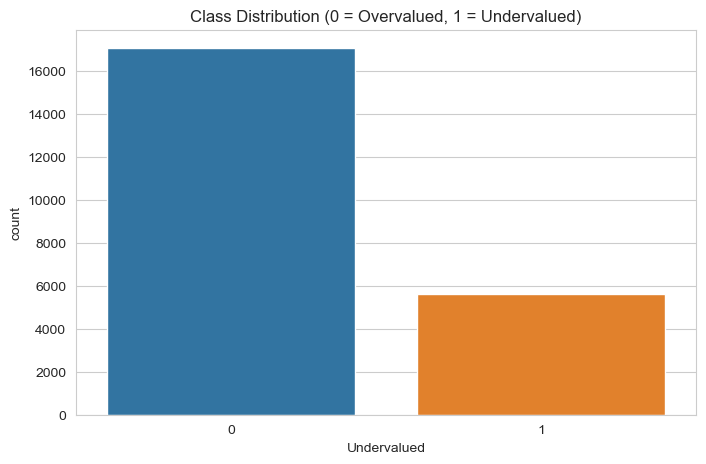

C:\Users\Mohammed Saif Wasay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


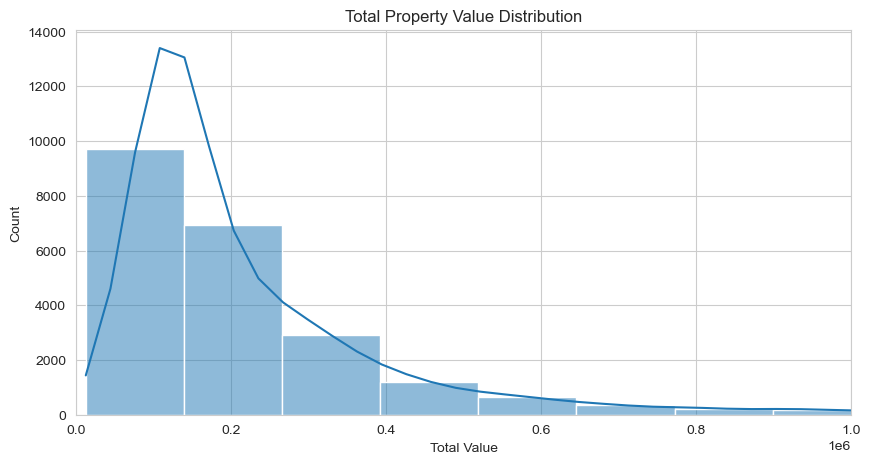

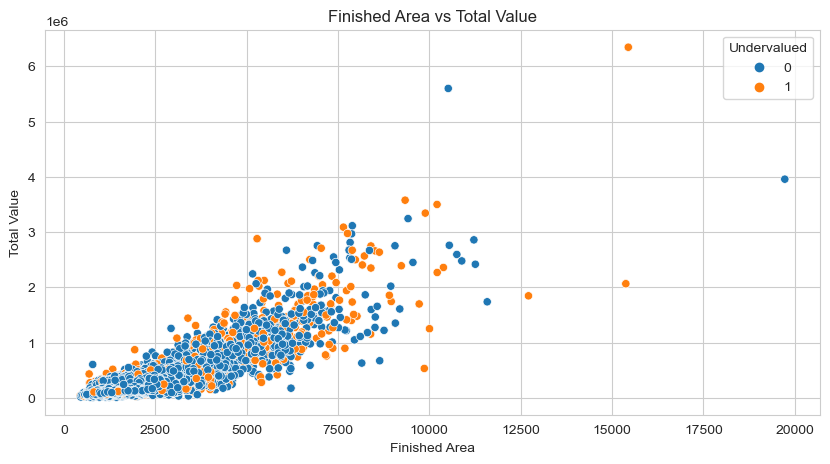

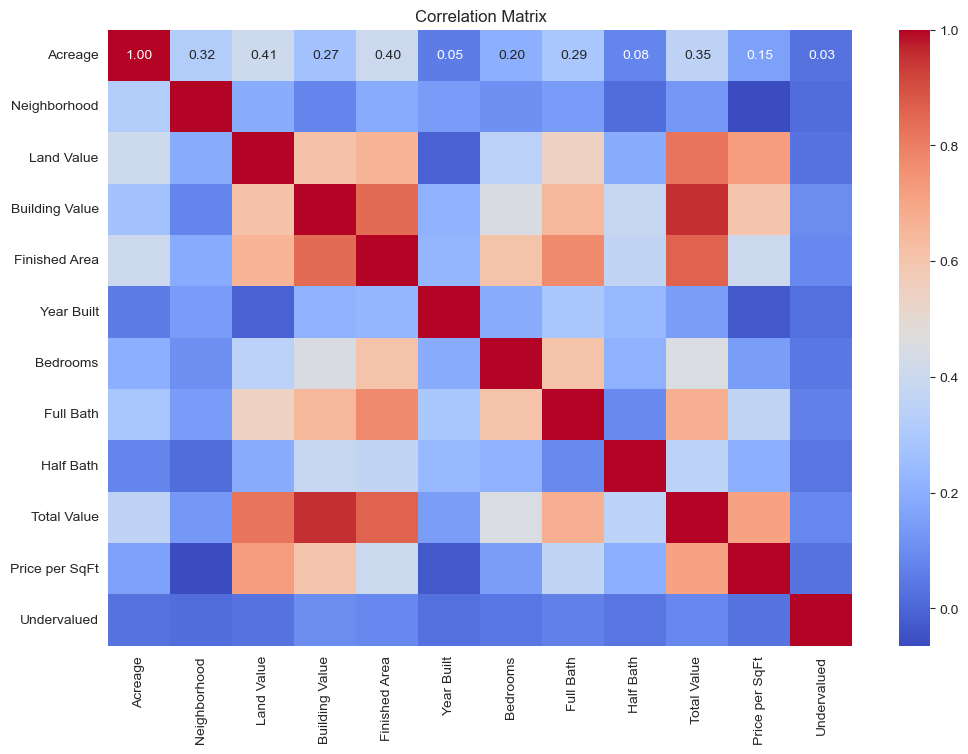

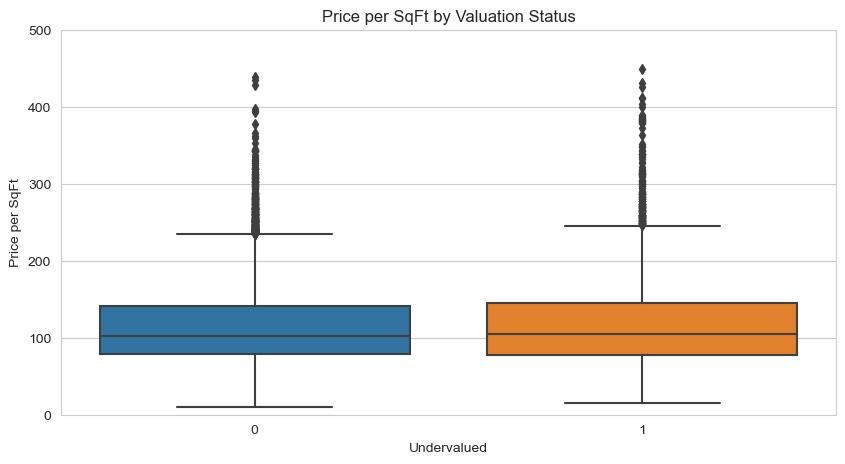


Linear Regression Model:
Mean Absolute Error: 7.874417174237453e-11
Root Mean Squared Error: 1.1659534991309951e-10
R-squared: 1.0

Decision Tree Model:
Mean Absolute Error: 3087.544150110375
Root Mean Squared Error: 17940.591689240468
R-squared: 0.9960784082797853

Random Forest Model:
Mean Absolute Error: 2342.528233995585
Root Mean Squared Error: 35338.987654018616
R-squared: 0.9847841204717761

Gradient Boosting Model:
Mean Absolute Error: 5933.667800196893
Root Mean Squared Error: 24078.722165635776
R-squared: 0.9929359181312783


<Figure size 1200x600 with 0 Axes>

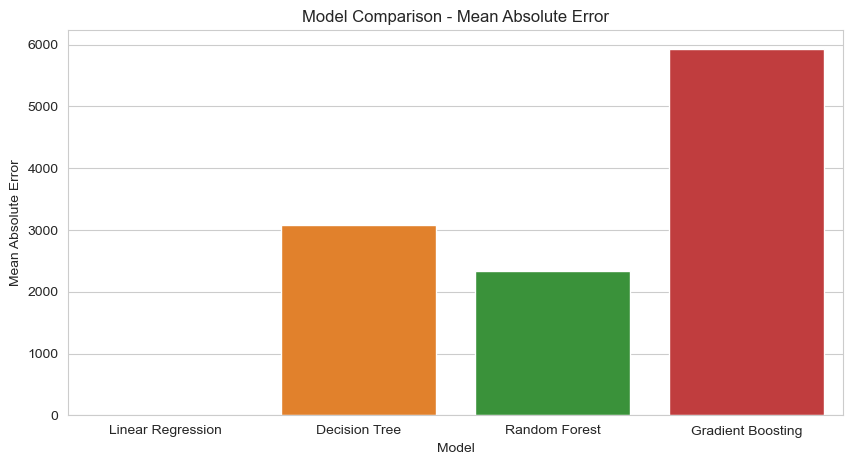

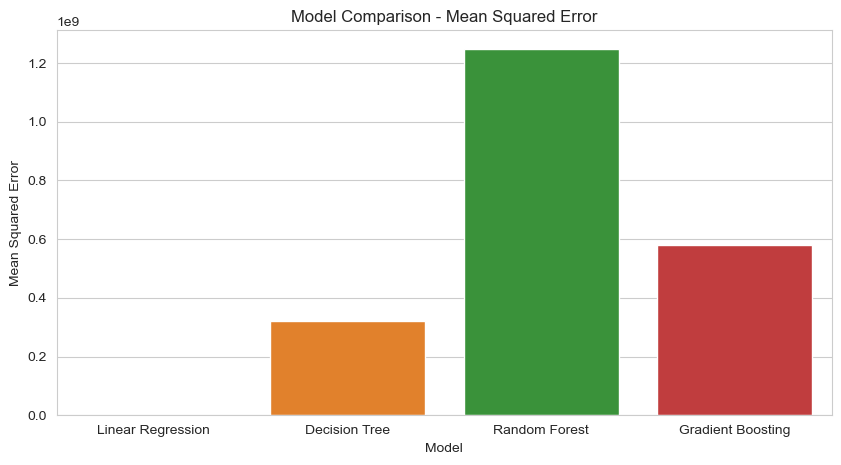

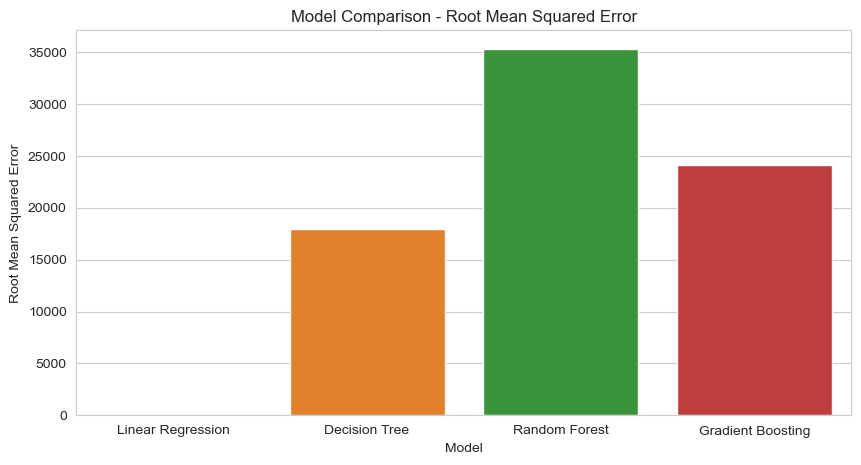

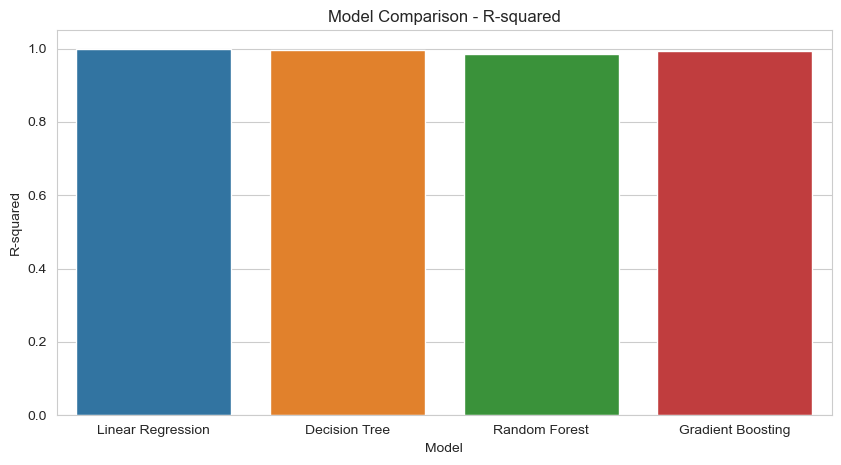

In [26]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading data
df = pd.read_csv('Nashville_housing_data.csv')

# Droping unnecessary columns like
df.drop(columns=['Unnamed: 0', 'Parcel ID', 'Legal Reference', 'Suite/ Condo   #', 
                 'Property Address', 'City', 'State'], inplace=True)

# Converting Sale Date to datetime
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

# Handle missing values
df['Bedrooms'].fillna(df['Bedrooms'].mode()[0], inplace=True)
df['Full Bath'].fillna(df['Full Bath'].mode()[0], inplace=True)
df['Half Bath'].fillna(df['Half Bath'].mode()[0], inplace=True)
df['Foundation Type'].fillna(df['Foundation Type'].mode()[0], inplace=True)
df.dropna(subset=['Finished Area'], inplace=True)

# Feature Engineering
df['Total Value'] = df['Land Value'] + df['Building Value']
df['Price per SqFt'] = df['Total Value'] / df['Finished Area']
df['Price per SqFt'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Price per SqFt'].fillna(df['Price per SqFt'].median(), inplace=True)

# Converting target variable to binary encoding
df['Undervalued'] = df['Sale Price Compared To Value'].map({'Under': 1, 'Over': 0})

# Droping the original target column
df.drop(columns=['Sale Price Compared To Value'], inplace=True)

# EDA Visualizations
plt.figure(figsize=(8, 5))
sns.countplot(x='Undervalued', data=df)
plt.title("Class Distribution (0 = Overvalued, 1 = Undervalued)")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Total Value'], bins=50, kde=True)
plt.title("Total Property Value Distribution")
plt.xlim(0, 1_000_000)
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Finished Area', y='Total Value', hue='Undervalued', data=df)
plt.title("Finished Area vs Total Value")
plt.show()

plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Undervalued', y='Price per SqFt', data=df)
plt.title("Price per SqFt by Valuation Status")
plt.ylim(0, 500)
plt.show()

# Feature Engineering & Preprocessing
features = ['Land Value', 'Building Value', 'Finished Area', 'Year Built', 
            'Acreage', 'Price per SqFt', 'Bedrooms', 'Full Bath', 'Half Bath']
X = df[features]
y = df['Total Value']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the train models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100)
}

# Storing results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
        "R-squared": r2
    }
    
    print(f"\n{name} Model:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")
    
# Visualizing Model Performance
plt.figure(figsize=(12,6))
metrics = ["Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error", "R-squared"]

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.title(f'Model Comparison - {metric}')
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.show()